In [1]:
import warnings; warnings.filterwarnings("ignore")
import os;
from sys import platform
print(os.getcwd())
if platform == "darwin":
    os.chdir('/Users/ziyingc/Dropbox/Lab/MotorCortex')
elif platform == "win32":
    os.chdir('D:\Dropbox\Lab\MotorCortex')
print(os.getcwd())
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.patches import Patch as patch
from matplotlib.gridspec import GridSpec
import matplotlib.cm as cm; import matplotlib.mlab as mlab
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from scipy import stats
import read_data as rd
import behavior_track as bt
import turning_track  as tt


fps = 30; fs_out = 1000; fs = 30000; T = 1/fs_out;

D:\Dropbox\Lab\MotorCortex\Multi_Rats_ver2.0
D:\Dropbox\Lab\MotorCortex


Rats/Rat_Outlaw/ pre sessions 7 l: 43  r: 48
Rats/Rat_Backup_plan/ pre sessions 5 l: 70  r: 78
Rats/Rat_Dragonfly/ pre sessions 5 l: 78  r: 77
Rats/Rat_Outlaw/ post sessions 52 l: 22  r: 55
Rats/Rat_Swashbuckler/ post sessions 15 l: 28  r: 26
Rats/Rat_Drifter/ post sessions 41 l: 112  r: 108
Rats/Rat_Unknown/ post sessions 7 l: 16  r: 19


Text(0.5,1,'average pre-turning traveling distance')

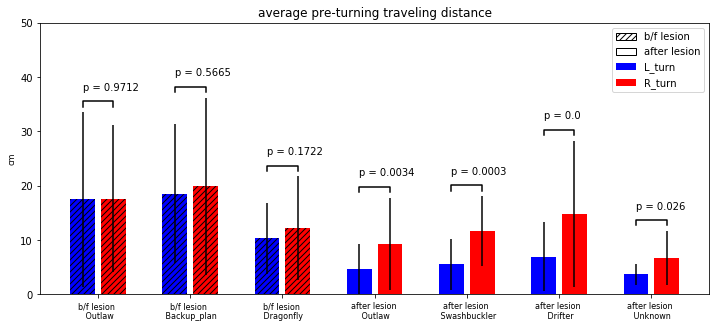

In [2]:
erfdn_pre = [
    'Rats/Rat_Outlaw/',
    'Rats/Rat_Backup_plan/',
    'Rats/Rat_Dragonfly/',
]
erfdn_post = np.load('Rats/Rats_Turn_ephy.npy')
# [
#     'Rats/Rat_Outlaw/',
#     'Rats/Rat_Drifter/',
#     'Rats/Rat_Unknown/',
#     'Rats/Rat_Swashbuckler/',
#     'Rats/Rat_Quartus/',
#     'Rats/Rat_Left/',
# ]

fig = plt.figure(1, figsize=(12,5)); gs = GridSpec(1,1);

n_r    = len(erfdn_pre)+len(erfdn_post); 
xtk    = np.arange(1, 3*n_r+1,  3)
xticklabel = [];

j = 0
for rfdn in erfdn_pre:
    epn = np.load(rfdn+'tracking'+'/epn_turn_pre.npy');
    xticklabel.append('b/f lesion \n '+rfdn[9:len(rfdn)-1])
    d_tn_l = np.empty((0,))
    d_tn_r = np.empty((0,))
    for k in epn:
        fdn      = rfdn + k + '/';
        d_pre_tn = np.load(fdn + 'tracking' +'/d_pre_tn.npy')*0.254;
        idx_tn   = np.load(fdn + 'tracking' +'/idx_tn.npy');
        d_tn_l = np.append(d_tn_l, d_pre_tn[idx_tn==1])
        d_tn_r = np.append(d_tn_r, d_pre_tn[idx_tn==0])
        
    t, p  = stats.ttest_ind(d_tn_l,   d_tn_r,  equal_var=False)
    print(rfdn, 'pre sessions', len(epn), 'l:',len(d_tn_l), ' r:',len(d_tn_r))
    
    d_l_m = np.mean(d_tn_l);  d_l_s = np.std(d_tn_l); d_l = d_l_m+d_l_s
    d_r_m = np.mean(d_tn_r);  d_r_s = np.std(d_tn_r); d_r = d_r_m+d_r_s
    ax_idx = gs[0,0];  ax = fig.add_subplot(ax_idx);
    ax.bar(xtk[j]-0.5, np.mean(d_tn_l),  yerr=np.std(d_tn_l), hatch='////',  color = 'b')
    ax.bar(xtk[j]+0.5, np.mean(d_tn_r),  yerr=np.std(d_tn_r), hatch='////',  color = 'r')
    d = np.max([d_r,d_l])
    
    ax.plot([xtk[j]-0.5, xtk[j]-0.5, xtk[j]+0.5, xtk[j]+0.5],
            [d+1, d+2, d+2, d+1], 'k', lw=1.5)
    ax.text(xtk[j]-0.5, d+4,  'p = '+str(np.round(p,4)), fontsize=10)

    j += 1
    
for rfdn in erfdn_post:
    epn = np.load(rfdn+'tracking'+'/epn_turn_post.npy');
    xticklabel.append('after lesion \n '+rfdn[9:len(rfdn)-1])
    d_tn_l = np.empty((0,))
    d_tn_r = np.empty((0,))
    for k in epn:
        fdn      = rfdn + k + '/';
        d_pre_tn = np.load(fdn + 'tracking' +'/d_pre_tn.npy')*0.254;
        idx_tn   = np.load(fdn + 'tracking' +'/idx_tn.npy');
        d_tn_l = np.append(d_tn_l, d_pre_tn[idx_tn==1])
        d_tn_r = np.append(d_tn_r, d_pre_tn[idx_tn==0])
        
    t, p  = stats.ttest_ind(d_tn_l,   d_tn_r,  equal_var=False)
    print(rfdn, 'post sessions', len(epn), 'l:',len(d_tn_l), ' r:',len(d_tn_r))
    d_l_m = np.mean(d_tn_l);  d_l_s = np.std(d_tn_l); d_l = d_l_m+d_l_s
    d_r_m = np.mean(d_tn_r);  d_r_s = np.std(d_tn_r); d_r = d_r_m+d_r_s
    ax.bar(xtk[j]-0.5, d_l_m,  yerr=d_l_s,  color = 'b')
    ax.bar(xtk[j]+0.5, d_r_m,  yerr=d_r_s,  color = 'r')
    d = np.max([d_r,d_l])
    
    ax.plot([xtk[j]-0.5, xtk[j]-0.5, xtk[j]+0.5, xtk[j]+0.5], 
            [d+1, d+2, d+2, d+1],              'k', lw=1.5)
    
    ax.text(xtk[j]-0.5, d+4,  'p = '+str(np.round(p,4)), fontsize=10)
    j += 1


ax.set_xticks     (xtk)
ax.set_xticklabels(xticklabel, fontsize=8)
# ax.tick_params(labelsize=15);
ax.set_ylabel('cm', fontsize = 8)
ax.set_ylim([0,50])

pre_patch   = patch(facecolor='white', edgecolor='k', hatch='////',label='b/f lesion')
post_patch  = patch(facecolor='white', edgecolor='k', label='after lesion')
l_patch  = patch(facecolor='blue',label='L_turn')
r_patch  = patch(facecolor='red', label='R_turn')
ax.legend(handles=[pre_patch,post_patch,l_patch,r_patch], loc='upper right', fontsize=10)
ax.set_title('average pre-turning traveling distance')


Rats/Rat_Outlaw/ pre sessions 7 l: 7  r: 7
Rats/Rat_Backup_plan/ pre sessions 5 l: 5  r: 5
Rats/Rat_Dragonfly/ pre sessions 5 l: 5  r: 5
Rats/Rat_Outlaw/ post sessions 52 l: 52  r: 52
Rats/Rat_Drifter/ post sessions 41 l: 41  r: 41
Rats/Rat_Unknown/ post sessions 7 l: 7  r: 7
Rats/Rat_Swashbuckler/ post sessions 15 l: 15  r: 15
Rats/Rat_Quartus/ post sessions 5 l: 5  r: 5
Rats/Rat_Left/ post sessions 12 l: 12  r: 12


Text(0.5,1,'average rate of turns during experiment sessions')

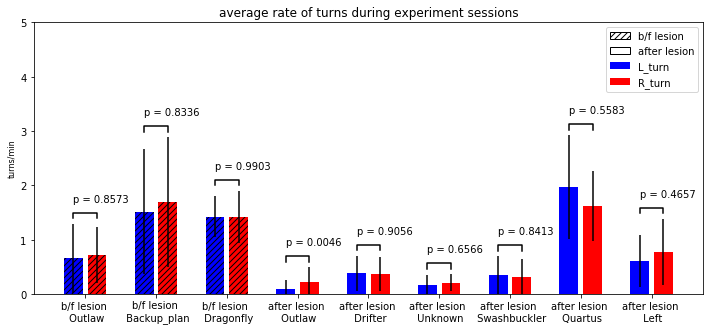

In [53]:
erfdn_pre = [
    'Rats/Rat_Outlaw/',
    'Rats/Rat_Backup_plan/',
    'Rats/Rat_Dragonfly/',
]
erfdn_post = [
    'Rats/Rat_Outlaw/',
    'Rats/Rat_Drifter/',
    'Rats/Rat_Unknown/',
    'Rats/Rat_Swashbuckler/',
    'Rats/Rat_Quartus/',
    'Rats/Rat_Left/',
]

fig = plt.figure(1, figsize=(12,5)); gs = GridSpec(1,1);
ax_idx = gs[0,0];  ax = fig.add_subplot(ax_idx);
n_r    = len(erfdn_pre)+len(erfdn_post); 
xtk    = np.arange(1, 3*n_r+1,  3)
xticklabel = [];

j = 0
for rfdn in erfdn_pre:
    epn = np.load(rfdn+'tracking'+'/epn_turn_pre.npy');
    xticklabel.append('b/f lesion \n '+rfdn[9:len(rfdn)-1])
    d_tn_l = np.empty((0,))
    d_tn_r = np.empty((0,))
    
    for k in epn:
        fdn      = rfdn + k + '/';
        ts_f = np.load(fdn+'tracking'+'/time_frame.npy')
        T = len(ts_f)/30/60
        d_pre_tn = np.load(fdn + 'tracking' +'/d_pre_tn.npy')*0.254;
        idx_tn   = np.load(fdn + 'tracking' +'/idx_tn.npy');
        d_tn_l = np.append(d_tn_l, len(d_pre_tn[idx_tn==1])/T)
        d_tn_r = np.append(d_tn_r, len(d_pre_tn[idx_tn==0])/T)
    t, p  = stats.ttest_ind(d_tn_l,   d_tn_r,  equal_var=False)
    print(rfdn, 'pre sessions', len(epn), 'l:',len(d_tn_l), ' r:',len(d_tn_r))
    
    d_l_m = np.mean(d_tn_l);  d_l_s = np.std(d_tn_l); d_l = d_l_m+d_l_s
    d_r_m = np.mean(d_tn_r);  d_r_s = np.std(d_tn_r); d_r = d_r_m+d_r_s
    ax_idx = gs[0,0];  ax = fig.add_subplot(ax_idx);
    ax.bar(xtk[j]-0.5, np.mean(d_tn_l),  yerr=np.std(d_tn_l), hatch='////',  color = 'b')
    ax.bar(xtk[j]+0.5, np.mean(d_tn_r),  yerr=np.std(d_tn_r), hatch='////',  color = 'r')
    d = np.max([d_r,d_l])
    
    ax.plot([xtk[j]-0.5, xtk[j]-0.5, xtk[j]+0.5, xtk[j]+0.5],
            [d+.1, d+.2, d+.2, d+.1], 'k', lw=1.5)
    ax.text(xtk[j]-0.5, d+.4,  'p = '+str(np.round(p,4)), fontsize=10)

    j += 1
    
for rfdn in erfdn_post:
    epn = np.load(rfdn+'tracking'+'/epn_turn_post.npy');
    xticklabel.append('after lesion \n '+rfdn[9:len(rfdn)-1])
    d_tn_l = np.empty((0,))
    d_tn_r = np.empty((0,))
    for k in epn:
        fdn      = rfdn + k + '/';
        ts_f = np.load(fdn+'tracking'+'/time_frame.npy')
        T = len(ts_f)/30/60
        d_pre_tn = np.load(fdn + 'tracking' +'/d_pre_tn.npy')*0.254;
        idx_tn   = np.load(fdn + 'tracking' +'/idx_tn.npy');
        d_tn_l = np.append(d_tn_l, len(d_pre_tn[idx_tn==1])/T)
        d_tn_r = np.append(d_tn_r, len(d_pre_tn[idx_tn==0])/T)

    t, p  = stats.ttest_ind(d_tn_l,   d_tn_r,  equal_var=False)
    print(rfdn, 'post sessions', len(epn), 'l:',len(d_tn_l), ' r:',len(d_tn_r))
    d_l_m = np.mean(d_tn_l);  d_l_s = np.std(d_tn_l); d_l = d_l_m+d_l_s
    d_r_m = np.mean(d_tn_r);  d_r_s = np.std(d_tn_r); d_r = d_r_m+d_r_s
    ax.bar(xtk[j]-0.5, d_l_m,  yerr=d_l_s,  color = 'b')
    ax.bar(xtk[j]+0.5, d_r_m,  yerr=d_r_s,  color = 'r')
    d = np.max([d_r,d_l])
    
    ax.plot([xtk[j]-0.5, xtk[j]-0.5, xtk[j]+0.5, xtk[j]+0.5], 
            [d+.1, d+.2, d+.2, d+.1],              'k', lw=1.5)
    
    ax.text(xtk[j]-0.5, d+.4,  'p = '+str(np.round(p,4)), fontsize=10)

    j += 1


ax.set_xticks     (xtk)
ax.set_xticklabels(xticklabel, fontsize=8)
ax.tick_params(labelsize=10);
ax.set_ylabel('turns/min', fontsize = 8)
ax.set_ylim([0,5])

pre_patch   = patch(facecolor='white', edgecolor='k', hatch='////',label='b/f lesion')
post_patch  = patch(facecolor='white', edgecolor='k', label='after lesion')
l_patch  = patch(facecolor='blue',label='L_turn')
r_patch  = patch(facecolor='red', label='R_turn')
ax.legend(handles=[pre_patch,post_patch,l_patch,r_patch], loc='upper right', fontsize=10)
ax.set_title('average rate of turns during experiment sessions')


190902_163132 post sessions 20 l: 11  r: 10
190902_164332 post sessions 20 l: 7  r: 12
190902_165211 post sessions 20 l: 4  r: 6
190902_165919 post sessions 20 l: 0  r: 6
190903_171044 post sessions 20 l: 12  r: 18
190903_171954 post sessions 20 l: 3  r: 3
190903_172626 post sessions 20 l: 0  r: 0
190903_173504 post sessions 20 l: 1  r: 0
190903_174649 post sessions 20 l: 2  r: 4
190904_164843 post sessions 20 l: 9  r: 9
190904_165710 post sessions 20 l: 10  r: 11
190904_170921 post sessions 20 l: 5  r: 7
190906_130451 post sessions 20 l: 4  r: 4
190906_131336 post sessions 20 l: 7  r: 6
190906_132037 post sessions 20 l: 3  r: 3
190906_132704 post sessions 20 l: 3  r: 4
190907_160304 post sessions 20 l: 10  r: 7
190907_161307 post sessions 20 l: 4  r: 3
190907_162730 post sessions 20 l: 7  r: 9
190908_154726 post sessions 20 l: 12  r: 11
20 20


Text(0,0.5,'distance travel b/f turns')

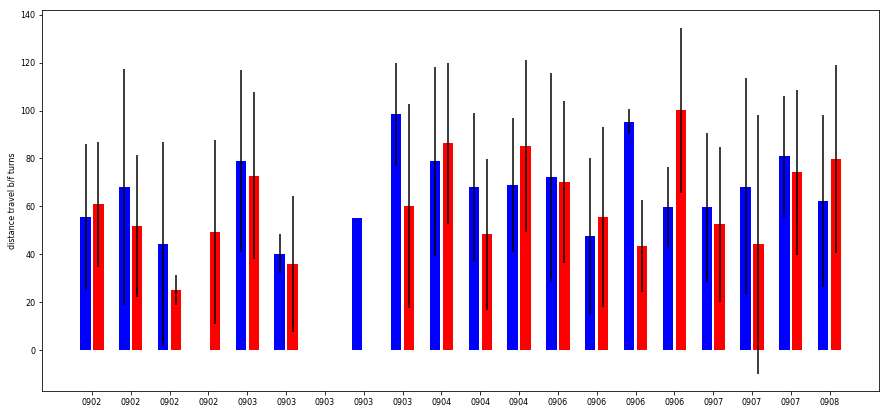

In [65]:
erfdn_pre = [

]
erfdn_post = [

    'Rats/Rat_Left/',
]


n_r    = len(erfdn_pre)+len(erfdn_post); 
xtk    = np.arange(1, 3*n_r+1,  3)
xticklabel = [];

  
for rfdn in erfdn_post:
    epn = np.load(rfdn+'tracking'+'/epn_turn_post.npy');
    fig = plt.figure(1, figsize=(15,7)); gs = GridSpec(1,1);
    ax_idx = gs[0,0];  ax = fig.add_subplot(ax_idx);
    n_r    = len(epn); 
    xtk    = np.arange(1, 3*n_r+1,  3)
    xticklabel = [];
    
    j = 0
    for k in epn:
        fdn      = rfdn + k + '/';
        
        xticklabel.append(k[12:16])
        
        d_pre_tn = np.load(fdn + 'tracking' +'/d_pre_tn.npy');
        idx_tn   = np.load(fdn + 'tracking' +'/idx_tn.npy');
        d_tn_l = d_pre_tn[idx_tn==1]
        d_tn_r = d_pre_tn[idx_tn==0]
        
        t, p  = stats.ttest_ind(d_tn_l,   d_tn_r,  equal_var=False)
        print(k[10:26], 'post sessions', len(epn), 'l:',len(d_tn_l), ' r:',len(d_tn_r))
        d_l_m = np.mean(d_tn_l);  d_l_s = np.std(d_tn_l); d_l = d_l_m+d_l_s
        d_r_m = np.mean(d_tn_r);  d_r_s = np.std(d_tn_r); d_r = d_r_m+d_r_s
        ax.bar(xtk[j]-0.5, d_l_m,  yerr=d_l_s,  color = 'b')
        ax.bar(xtk[j]+0.5, d_r_m,  yerr=d_r_s,  color = 'r')
        j += 1

print(len(xtk), len(xticklabel))
ax.set_xticks     (xtk)
ax.set_xticklabels(xticklabel)
ax.tick_params(labelsize=8);
ax.set_ylabel('distance travel b/f turns',fontsize = 8)

# pre_patch   = patch(facecolor='white', edgecolor='k', hatch='////',label='b/f lesion')
# post_patch  = patch(facecolor='white', edgecolor='k', label='after lesion')
# l_patch  = patch(facecolor='blue',label='L_turn')
# r_patch  = patch(facecolor='red', label='R_turn')

# ax.legend(handles=[pre_patch,post_patch,l_patch,r_patch], loc='upper right', fontsize=12)

Rats/Rat_Outlaw/ pre sessions 7 l: 50  r: 52
Rats/Rat_Backup_plan/ pre sessions 5 l: 84  r: 80
Rats/Rat_Dragonfly/ pre sessions 5 l: 87  r: 87
Rats/Rat_Outlaw/ post sessions 52 l: 27  r: 51
Rats/Rat_Drifter/ post sessions 41 l: 108  r: 112
Rats/Rat_Unknown/ post sessions 7 l: 15  r: 24
Rats/Rat_Swashbuckler/ post sessions 15 l: 27  r: 28
Rats/Rat_Quartus/ post sessions 5 l: 91  r: 77
Rats/Rat_Left/ post sessions 20 l: 137  r: 138


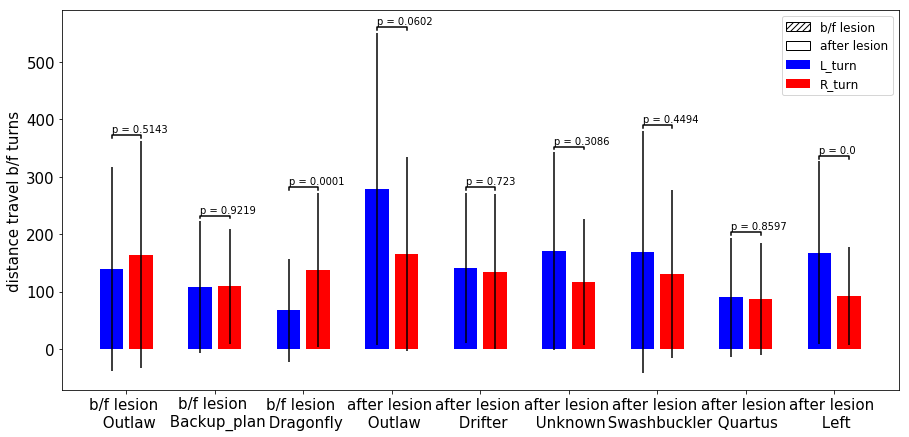

In [15]:
erfdn_pre = [
    'Rats/Rat_Outlaw/',
    'Rats/Rat_Backup_plan/',
    'Rats/Rat_Dragonfly/',
]
erfdn_post = [
    'Rats/Rat_Outlaw/',
    'Rats/Rat_Drifter/',
    'Rats/Rat_Unknown/',
    'Rats/Rat_Swashbuckler/',
    'Rats/Rat_Quartus/',
    'Rats/Rat_Left/',
]

fig = plt.figure(1, figsize=(15,7)); gs = GridSpec(1,1);
ax_idx = gs[0,0];  ax = fig.add_subplot(ax_idx);
n_r    = len(erfdn_pre)+len(erfdn_post); 
xtk    = np.arange(1, 3*n_r+1,  3)
xticklabel = [];

j = 0
for rfdn in erfdn_pre:
    epn = np.load(rfdn+'tracking'+'/epn_turn_pre.npy');
    xticklabel.append('b/f lesion \n '+rfdn[9:len(rfdn)-1])
    T_tn_l = np.empty((0,))
    T_tn_r = np.empty((0,))
    for k in epn:
        fdn      = rfdn + k + '/';
        idx_tn   = np.load(fdn + 'tracking' +'/idx_tn.npy');
        T_tn     = np.load(fdn + 'tracking' +'/T_tn_idx21.npy');
        T_tn_l = np.append(T_tn_l, T_tn[idx_tn==1])
        T_tn_r = np.append(T_tn_r, T_tn[idx_tn==0])
        
    t, p  = stats.ttest_ind(T_tn_l,   T_tn_r,  equal_var=False)
    print(rfdn, 'pre sessions', len(epn), 'l:',len(T_tn_l), ' r:',len(T_tn_r)) 
    d_l_m = np.mean(T_tn_l);  d_l_s = np.std(T_tn_l); d_l = d_l_m+d_l_s
    d_r_m = np.mean(T_tn_r);  d_r_s = np.std(T_tn_r); d_r = d_r_m+d_r_s
    
    ax.bar(xtk[j]-0.5, d_l_m,  yerr=d_l_s,  color = 'b')
    ax.bar(xtk[j]+0.5, d_r_m,  yerr=d_r_s,  color = 'r')
    d = np.max([d_r,d_l])
    ax.plot([xtk[j]-0.5, xtk[j]-0.5, xtk[j]+0.5, xtk[j]+0.5], 
            [d+5, d+10, d+10, d+5],              'k', lw=1.5)
    
    ax.text(xtk[j]-0.5, d+15,  'p = '+str(np.round(p,4)), fontsize=10)
    j += 1

    
for rfdn in erfdn_post:
    epn = np.load(rfdn+'tracking'+'/epn_turn_post.npy');
    xticklabel.append('after lesion \n '+rfdn[9:len(rfdn)-1])
    T_tn_l = np.empty((0,))
    T_tn_r = np.empty((0,))
    for k in epn:
        fdn      = rfdn + k + '/';
        idx_tn   = np.load(fdn + 'tracking' +'/idx_tn.npy');
        T_tn     = np.load(fdn + 'tracking' +'/T_tn_idx21.npy');
        T_tn_l = np.append(T_tn_l, T_tn[idx_tn==1])
        T_tn_r = np.append(T_tn_r, T_tn[idx_tn==0])
        
    t, p  = stats.ttest_ind(T_tn_l,   T_tn_r,  equal_var=False)
    print(rfdn, 'post sessions', len(epn), 'l:',len(T_tn_l), ' r:',len(T_tn_r)) 
    d_l_m = np.mean(T_tn_l);  d_l_s = np.std(T_tn_l); d_l = d_l_m+d_l_s
    d_r_m = np.mean(T_tn_r);  d_r_s = np.std(T_tn_r); d_r = d_r_m+d_r_s
    
    
    ax.bar(xtk[j]-0.5, d_l_m,  yerr=d_l_s,  color = 'b')
    ax.bar(xtk[j]+0.5, d_r_m,  yerr=d_r_s,  color = 'r')
    d = np.max([d_r,d_l])
    ax.plot([xtk[j]-0.5, xtk[j]-0.5, xtk[j]+0.5, xtk[j]+0.5], 
            [d+5, d+10, d+10, d+5],              'k', lw=1.5)
    
    ax.text(xtk[j]-0.5, d+15,  'p = '+str(np.round(p,4)), fontsize=10)
    j += 1


ax.set_xticks     (xtk)
ax.set_xticklabels(xticklabel)
ax.tick_params(labelsize=15);
ax.set_ylabel('distance travel b/f turns',fontsize = 15)
# ax.set_ylim([0,250])

pre_patch   = patch(facecolor='white', edgecolor='k', hatch='////',label='b/f lesion')
post_patch  = patch(facecolor='white', edgecolor='k', label='after lesion')
l_patch  = patch(facecolor='blue',label='L_turn')
r_patch  = patch(facecolor='red', label='R_turn')

ax.legend(handles=[pre_patch,post_patch,l_patch,r_patch], loc='upper right', fontsize=12)

Rats/Rat_Outlaw/ pre sessions 7 l: 50  r: 52
Rats/Rat_Backup_plan/ pre sessions 5 l: 84  r: 80
Rats/Rat_Dragonfly/ pre sessions 5 l: 87  r: 87
Rats/Rat_Outlaw/ post sessions 52 l: 27  r: 51
Rats/Rat_Drifter/ post sessions 41 l: 108  r: 112
Rats/Rat_Unknown/ post sessions 7 l: 15  r: 24
Rats/Rat_Swashbuckler/ post sessions 15 l: 27  r: 28
Rats/Rat_Quartus/ post sessions 5 l: 91  r: 77
Rats/Rat_Left/ post sessions 20 l: 137  r: 138


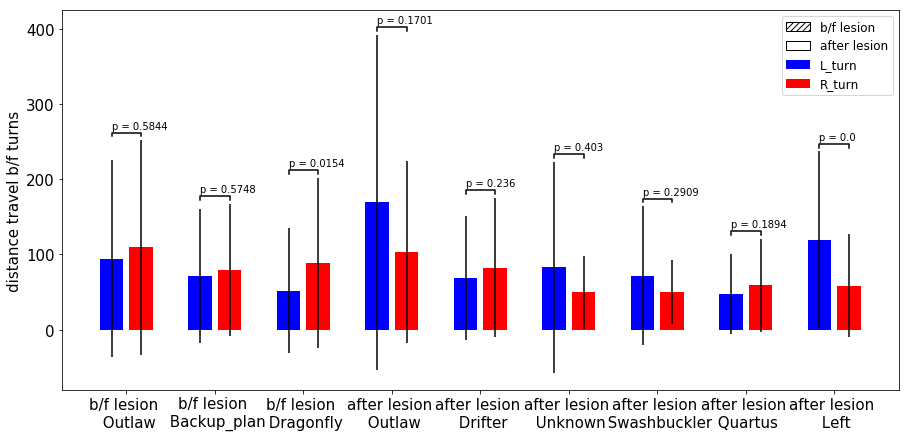

In [16]:
erfdn_pre = [
    'Rats/Rat_Outlaw/',
    'Rats/Rat_Backup_plan/',
    'Rats/Rat_Dragonfly/',
]
erfdn_post = [
    'Rats/Rat_Outlaw/',
    'Rats/Rat_Drifter/',
    'Rats/Rat_Unknown/',
    'Rats/Rat_Swashbuckler/',
    'Rats/Rat_Quartus/',
    'Rats/Rat_Left/',
]

fig = plt.figure(1, figsize=(15,7)); gs = GridSpec(1,1);
ax_idx = gs[0,0];  ax = fig.add_subplot(ax_idx);
n_r    = len(erfdn_pre)+len(erfdn_post); 
xtk    = np.arange(1, 3*n_r+1,  3)
xticklabel = [];

j = 0
for rfdn in erfdn_pre:
    epn = np.load(rfdn+'tracking'+'/epn_turn_pre.npy');
    xticklabel.append('b/f lesion \n '+rfdn[9:len(rfdn)-1])
    T_tn_l = np.empty((0,))
    T_tn_r = np.empty((0,))
    for k in epn:
        fdn      = rfdn + k + '/';
        idx_tn   = np.load(fdn + 'tracking' +'/idx_tn.npy');
        T_tn     = np.load(fdn + 'tracking' +'/T_tn_idx.npy');
        T_tn_l = np.append(T_tn_l, T_tn[idx_tn==1])
        T_tn_r = np.append(T_tn_r, T_tn[idx_tn==0])
        
    t, p  = stats.ttest_ind(T_tn_l,   T_tn_r,  equal_var=False)
    print(rfdn, 'pre sessions', len(epn), 'l:',len(T_tn_l), ' r:',len(T_tn_r)) 
    d_l_m = np.mean(T_tn_l);  d_l_s = np.std(T_tn_l); d_l = d_l_m+d_l_s
    d_r_m = np.mean(T_tn_r);  d_r_s = np.std(T_tn_r); d_r = d_r_m+d_r_s
    
    ax.bar(xtk[j]-0.5, d_l_m,  yerr=d_l_s,  color = 'b')
    ax.bar(xtk[j]+0.5, d_r_m,  yerr=d_r_s,  color = 'r')
    d = np.max([d_r,d_l])
    ax.plot([xtk[j]-0.5, xtk[j]-0.5, xtk[j]+0.5, xtk[j]+0.5], 
            [d+5, d+10, d+10, d+5],              'k', lw=1.5)
    
    ax.text(xtk[j]-0.5, d+15,  'p = '+str(np.round(p,4)), fontsize=10)
    j += 1

    
for rfdn in erfdn_post:
    epn = np.load(rfdn+'tracking'+'/epn_turn_post.npy');
    xticklabel.append('after lesion \n '+rfdn[9:len(rfdn)-1])
    T_tn_l = np.empty((0,))
    T_tn_r = np.empty((0,))
    for k in epn:
        fdn      = rfdn + k + '/';
        idx_tn   = np.load(fdn + 'tracking' +'/idx_tn.npy');
        T_tn     = np.load(fdn + 'tracking' +'/T_tn_idx.npy');
        T_tn_l = np.append(T_tn_l, T_tn[idx_tn==1])
        T_tn_r = np.append(T_tn_r, T_tn[idx_tn==0])
        
    t, p  = stats.ttest_ind(T_tn_l,   T_tn_r,  equal_var=False)
    print(rfdn, 'post sessions', len(epn), 'l:',len(T_tn_l), ' r:',len(T_tn_r)) 
    d_l_m = np.mean(T_tn_l);  d_l_s = np.std(T_tn_l); d_l = d_l_m+d_l_s
    d_r_m = np.mean(T_tn_r);  d_r_s = np.std(T_tn_r); d_r = d_r_m+d_r_s
    
    
    ax.bar(xtk[j]-0.5, d_l_m,  yerr=d_l_s,  color = 'b')
    ax.bar(xtk[j]+0.5, d_r_m,  yerr=d_r_s,  color = 'r')
    d = np.max([d_r,d_l])
    ax.plot([xtk[j]-0.5, xtk[j]-0.5, xtk[j]+0.5, xtk[j]+0.5], 
            [d+5, d+10, d+10, d+5],              'k', lw=1.5)
    
    ax.text(xtk[j]-0.5, d+15,  'p = '+str(np.round(p,4)), fontsize=10)
    j += 1


ax.set_xticks     (xtk)
ax.set_xticklabels(xticklabel)
ax.tick_params(labelsize=15);
ax.set_ylabel('distance travel b/f turns',fontsize = 15)
# ax.set_ylim([0,250])

pre_patch   = patch(facecolor='white', edgecolor='k', hatch='////',label='b/f lesion')
post_patch  = patch(facecolor='white', edgecolor='k', label='after lesion')
l_patch  = patch(facecolor='blue',label='L_turn')
r_patch  = patch(facecolor='red', label='R_turn')

ax.legend(handles=[pre_patch,post_patch,l_patch,r_patch], loc='upper right', fontsize=12)